# Laboratório 2: CRC

## Parte 2: O algoritmo

In [3]:
def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado += '0'
        else:
            resultado += '1'
    return resultado


def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).
    
    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).
        
    Returns:
        A string binária de r bits representando o CRC.
    """
    # 1. Obtenha o grau 'r' do gerador.
    r = len(gerador_bits) - 1
    
    # 2. Crie M(x) * 2^r, que é a mensagem com 'r' zeros anexados.
    mensagem_aumentada = list(dados_bits + '0' * r)
    
    # 3. Implemente o loop de divisão.
    for i in range(len(dados_bits)):
        if mensagem_aumentada[i] == '1':
            # Pega os próximos r+1 bits para operação XOR
            janela_atual = "".join(mensagem_aumentada[i:i + r + 1])
            resultado_xor = xor_bits(janela_atual, gerador_bits)
            
            # Atualiza a mensagem com o resultado do XOR
            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]
    
    # 4. O resto da divisão são os 'r' bits finais da mensagem processada.
    resto = "".join(mensagem_aumentada[-r:])
    return resto

In [4]:
# Exemplo de uso para validação
dados_teste = "1101011111"  # M(x)
gerador_teste = "10011"    # G(x)
crc_calculado = calcular_crc_manual(dados_teste, gerador_teste)

print(f"Dados M(x): {dados_teste}")
print(f"Gerador G(x): {gerador_teste}")
print(f"CRC Calculado: {crc_calculado}")

Dados M(x): 1101011111
Gerador G(x): 10011
CRC Calculado: 0010


Como podemos perceber, o CRC calculado bate com o slide 48 da RCNA_05.

## Parte 3: Relatório com gráficos

In [ ]:
# Instalação das bibliotecas
%pip install crc
%pip install matplotlib

  Using cached matplotlib-3.10.3-cp313-cp313-macosx_10_13_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-macosx_10_13_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_10_13_x86_64.whl.metadata (6.2 kB)
  Using cached numpy-2.3.1-cp313-cp313-macosx_14_0_x86_64.whl.metadata (62 kB)
  Using cached pillow-11.3.0-cp313-cp313-macosx_10_13_x86_64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-macosx_10_13_x86_64.whl (8.2 MB)
Using cached contourpy-1.3.2-cp313-cp313-macosx_10_13_x86_64.whl (271 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 2.7 MB/s eta 0:00:002.7 MB/s eta 0:00:01
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_10_13_x86_64.whl (66 kB)
Using cached numpy-2.3.1-cp313-cp313-macosx_14_0_x86_64.whl (6.6 MB)
Using cac

Iniciando testes de desempenho...

Testando com mensagem de 1500 bytes...
Manual: 0.2712s, 105.75 KiB
Biblioteca: 0.1184s, 1.46 KiB

Testando com mensagem de 3000 bytes...
Manual: 0.5676s, 211.22 KiB
Biblioteca: 0.2177s, 1.23 KiB

Testando com mensagem de 4500 bytes...
Manual: 0.8014s, 316.69 KiB
Biblioteca: 0.3305s, 1.23 KiB

Testando com mensagem de 6000 bytes...
Manual: 1.2054s, 422.16 KiB
Biblioteca: 0.5675s, 2.08 KiB

Testando com mensagem de 9000 bytes...
Manual: 1.6345s, 633.09 KiB
Biblioteca: 0.6561s, 1.23 KiB

Testando com mensagem de 16000 bytes...
Manual: 2.9647s, 1125.28 KiB
Biblioteca: 1.1448s, 1.23 KiB


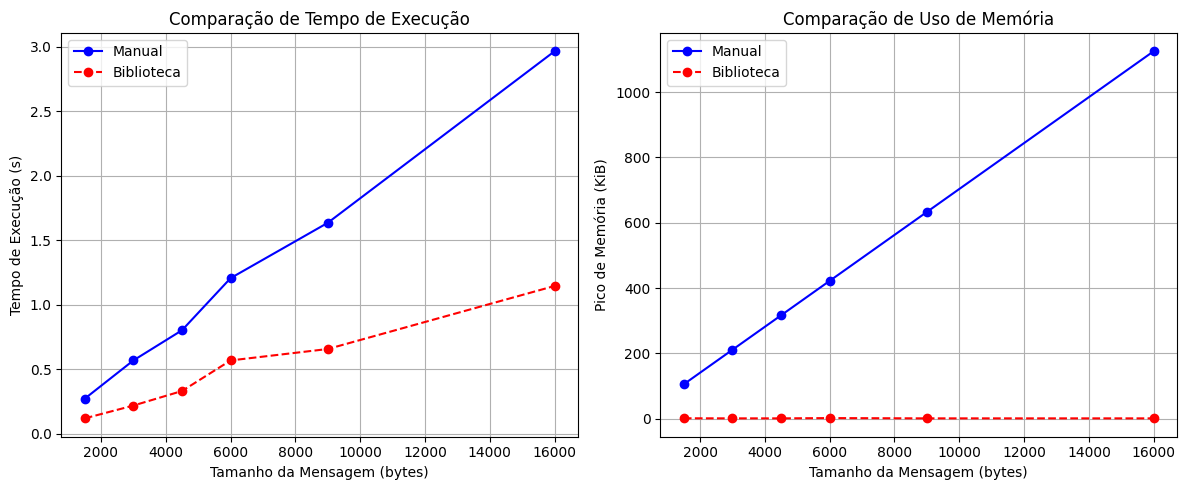


Resultados Detalhados:
| Tamanho (bytes) | Tempo Manual (s) | Mem Manual (KiB) | Tempo Lib (s) | Mem Lib (KiB) |
|-----------------|------------------|------------------|---------------|---------------|
|            1500 |           0.2712 |           105.75 |        0.1184 |          1.46 |
|            3000 |           0.5676 |           211.22 |        0.2177 |          1.23 |
|            4500 |           0.8014 |           316.69 |        0.3305 |          1.23 |
|            6000 |           1.2054 |           422.16 |        0.5675 |          2.08 |
|            9000 |           1.6345 |           633.09 |        0.6561 |          1.23 |
|           16000 |           2.9647 |          1125.28 |        1.1448 |          1.23 |


In [1]:
import time
import tracemalloc
import os
import matplotlib.pyplot as plt
from crc import Calculator, Crc16

# Nossa implementação manual (já corrgida)
def xor_bits(a, b):
    """Realiza XOR bit a bit entre duas strings binárias."""
    return ''.join('0' if a[i] == b[i] else '1' for i in range(len(a)))

def calcular_crc_manual(dados_bits, gerador_bits):
    """Calcula CRC manualmente usando divisão polinomial via XOR."""
    r = len(gerador_bits) - 1
    mensagem_aumentada = list(dados_bits + '0' * r)
    
    for i in range(len(dados_bits)):
        if mensagem_aumentada[i] == '1':
            janela = ''.join(mensagem_aumentada[i:i+r+1])
            xor_result = xor_bits(janela, gerador_bits)
            for j in range(len(xor_result)):
                mensagem_aumentada[i+j] = xor_result[j]
    
    return ''.join(mensagem_aumentada[-r:])

# Configuração do teste
gerador = "11000000000000101"  # CRC-16/MODBUS
calculator_lib = Calculator(Crc16.MODBUS)  # Configuração da biblioteca

# Tamanhos de mensagem para teste (em bytes)
tamanhos_bytes = [1500, 3000, 4500, 6000, 9000, 16000]
resultados = []

print("Iniciando testes de desempenho...")
for tamanho in tamanhos_bytes:
    print(f"\nTestando com mensagem de {tamanho} bytes...")
    
    # Gera mensagem aleatória e converte para bits
    mensagem_bytes = os.urandom(tamanho)
    mensagem_bits = ''.join(format(byte, '08b') for byte in mensagem_bytes)
    
    # Teste da implementação manual
    tracemalloc.start()
    start_time = time.perf_counter()
    
    crc_manual = calcular_crc_manual(mensagem_bits, gerador)
    
    end_time = time.perf_counter()
    _, mem_pico_manual = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    tempo_manual = end_time - start_time
    
    # Teste da biblioteca
    tracemalloc.start()
    start_time = time.perf_counter()
    
    crc_lib = calculator_lib.checksum(mensagem_bytes)
    
    end_time = time.perf_counter()
    _, mem_pico_lib = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    tempo_lib = end_time - start_time
    
    # Armazena resultados
    resultados.append({
        'tamanho': tamanho,
        'tempo_manual': tempo_manual,
        'mem_pico_manual': mem_pico_manual / 1024,  # em KiB
        'tempo_lib': tempo_lib,
        'mem_pico_lib': mem_pico_lib / 1024  # em KiB
    })
    
    print(f"Manual: {tempo_manual:.4f}s, {mem_pico_manual/1024:.2f} KiB")
    print(f"Biblioteca: {tempo_lib:.4f}s, {mem_pico_lib/1024:.2f} KiB")

# Geração de gráficos
plt.figure(figsize=(12, 5))

# Gráfico 1: Tempo de Execução
plt.subplot(1, 2, 1)
plt.plot(
    [r['tamanho'] for r in resultados],
    [r['tempo_manual'] for r in resultados],
    'b-o', label='Manual'
)
plt.plot(
    [r['tamanho'] for r in resultados],
    [r['tempo_lib'] for r in resultados],
    'r--o', label='Biblioteca'
)
plt.xlabel('Tamanho da Mensagem (bytes)')
plt.ylabel('Tempo de Execução (s)')
plt.title('Comparação de Tempo de Execução')
plt.grid(True)
plt.legend()

# Gráfico 2: Uso de Memória
plt.subplot(1, 2, 2)
plt.plot(
    [r['tamanho'] for r in resultados],
    [r['mem_pico_manual'] for r in resultados],
    'b-o', label='Manual'
)
plt.plot(
    [r['tamanho'] for r in resultados],
    [r['mem_pico_lib'] for r in resultados],
    'r--o', label='Biblioteca'
)
plt.xlabel('Tamanho da Mensagem (bytes)')
plt.ylabel('Pico de Memória (KiB)')
plt.title('Comparação de Uso de Memória')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Exibir resultados em tabela
print("\nResultados Detalhados:")
print("| Tamanho (bytes) | Tempo Manual (s) | Mem Manual (KiB) | Tempo Lib (s) | Mem Lib (KiB) |")
print("|-----------------|------------------|------------------|---------------|---------------|")
for r in resultados:
    print(f"| {r['tamanho']:15} | {r['tempo_manual']:16.4f} | {r['mem_pico_manual']:16.2f} | {r['tempo_lib']:13.4f} | {r['mem_pico_lib']:13.2f} |")

Para a realização dos testes foi usado uma máquina com as seguintes especificações:

* SO: macOS Sequoia 15.5 x86_64
* Kernel: Darwin 24.5.0
* CPU: Intel(R) Core(TM) i5-8259U (8) @ 2.30 GHz
* Memória: 8.00 GiB

### Relatório

#### 1. Comparação de desempenho

* A biblioteca CRC foi consideravelmente mais rápida do que a implementação manual, como mostra o primeiro gráfico de comparação de tempo
* Por exemplo, para tamanhos de mensagem de 9000 bytes (comum para Jumbo Frames), a implementação da biblioteca foi aproximadamente 149% mais rápida
* A partir do gráfico percebemos que a curva de tempo para a implementação manual é bem mais acentuada do que para a biblioteca

#### 2. Comparação de uso de memória

* Aqui a diferença foi a mais significativa
* Como podemos perceber no segundo gráfico, a implementação manual está de ordem de O(n) (ou seja, linear), enquanto que a implementação da biblioteca está na ordem de O(1) (isto é, constante)
* Por exemplo, para tamanhos de palavras de 16000 bytes, o uso de memória da biblioteca foi de ~1KB enquanto que o uso de memória da implementação manual foi de ~1MB, ou seja, na ordem de 1000x mais.
* É possível concluir que a implementação manual não é escalável, dado seu uso de memória linear.

## Parte 4: Investigação dos erros

In [57]:
import random
import binascii
from crc import Calculator, Crc16

# Funções CRC (já implementadas anteriormente)
def xor_bits(a, b):
    return ''.join('0' if a[i] == b[i] else '1' for i in range(len(a)))

def calcular_crc_manual(dados_bits, gerador_bits):
    r = len(gerador_bits) - 1
    mensagem_aumentada = list(dados_bits + '0' * r)
    
    for i in range(len(dados_bits)):
        if mensagem_aumentada[i] == '1':
            janela = ''.join(mensagem_aumentada[i:i+r+1])
            xor_result = xor_bits(janela, gerador_bits)
            for j in range(len(xor_result)):
                mensagem_aumentada[i+j] = xor_result[j]
    
    return ''.join(mensagem_aumentada[-r:])

# Configuração do cenário pessoal
nome_completo = "Isaac Vicente de Medeiros Silva"

# 4.1 - Preparação do cenário
# a. Converter nome para bits (ASCII 8 bits por caractere)
mensagem_base = ''.join(format(ord(c), '08b') for c in nome_completo)

gerador = "1100000100010001"   # CRC-16/ARC (representação de 17 bits)
calculator_lib = Calculator(Crc16.IBM_3740)

# Calcular CRC inicial
crc_manual = calcular_crc_manual(mensagem_base, gerador)
crc_lib = calculator_lib.checksum(nome_completo.encode('ascii'))

# 4.2 - A Caça aos Erros
def inserir_erro(mensagem, tamanho_erro):
    """Insere um erro de rajada de n bits em posição aleatória"""
    pos = random.randint(0, len(mensagem) - tamanho_erro)
    bits_originais = mensagem[pos:pos+tamanho_erro]
    bits_erro = ''.join('1' if b == '0' else '0' for b in bits_originais)
    return mensagem[:pos] + bits_erro + mensagem[pos+tamanho_erro:], pos

resultados_testes = []

print("="*70)
print("ANÁLISE DE DETECÇÃO DE ERROS CRC-16")
print("="*70)
print(f"Nome: {nome_completo}")
print(f"Mensagem base ({len(mensagem_base)} bits):\n{mensagem_base[:50]}...{mensagem_base[-50:]}")
print(f"CRC Manual: {crc_manual}")
print(f"CRC Biblioteca: {hex(crc_lib)}")
print("="*70 + "\n")

for teste in range(1, 101):
    print(f"\nTeste {teste}/100")

    # Gerar erro aleatório (entre 1 e 256 bits)
    tamanho_erro = random.randint(1, 256)
    quadro_transmitido = mensagem_base + crc_manual
    quadro_corrompido, posicao_erro = inserir_erro(quadro_transmitido, tamanho_erro)
    
    # Verificar com implementação manual
    dados_corrompidos = quadro_corrompido[:-len(crc_manual)]
    crc_recebido_manual = calcular_crc_manual(dados_corrompidos, gerador)
    erro_detectado_manual = crc_recebido_manual != crc_manual
    
    # Verificar com biblioteca
    try:
        # Converter bits para bytes (ASCII)
        dados_bytes = int(dados_corrompidos, 2).to_bytes((len(dados_corrompidos) + 7) // 8, 'big')
        crc_recebido_lib = calculator_lib.checksum(dados_bytes)
        erro_detectado_lib = crc_recebido_lib != crc_lib
    except:
        erro_detectado_lib = True  # Considera erro se não puder converter
    
    # Registrar resultados
    resultados_testes.append({
        'teste': teste,
        'tamanho_erro': tamanho_erro,
        'posicao_erro': posicao_erro,
        'padrao_erro': quadro_corrompido[posicao_erro:posicao_erro+tamanho_erro],
        'detectado_manual': erro_detectado_manual,
        'detectado_lib': erro_detectado_lib
    })
    
    print(f"Erro de {tamanho_erro} bits na posição {posicao_erro}")
    print(f"Manual: {'DETECTADO' if erro_detectado_manual else 'NÃO DETECTADO'}")
    print(f"Biblioteca: {'DETECTADO' if erro_detectado_lib else 'NÃO DETECTADO'}")

# Relatório Final
print("\n" + "="*70)
print("RELATÓRIO FINAL - PONTOS CEGOS DO CRC")
print("="*70)
print(f"Gerador usado: {gerador}")
print("="*70)
print("| Teste | Tamanho Erro | Posição | Manual | Biblioteca |")
print("|-------|--------------|---------|--------|------------|")

ponto_cego_encontrado = False
for resultado in resultados_testes:
    manual = '✔' if resultado['detectado_manual'] else '✖'
    lib = '✔' if resultado['detectado_lib'] else '✖'
    
    print(f"| {resultado['teste']:5} | {resultado['tamanho_erro']:12} | {resultado['posicao_erro']:7} | {manual:6} | {lib:10} |")
    
    if not resultado['detectado_manual'] or not resultado['detectado_lib']:
        ponto_cego_encontrado = True
        print(f"! Ponto cego encontrado no Teste {resultado['teste']}:")
        print(f"  - Padrão de erro: {resultado['padrao_erro']}")
        print(f"  - Posição: {resultado['posicao_erro']}")
        print(f"  - Tamanho: {resultado['tamanho_erro']} bits")

if not ponto_cego_encontrado:
    print("\nTodos os erros foram detectados por ambas implementações!")
else:
    print("\nALERTA: Foram encontrados padrões de erro não detectados!")

print("="*70)

ANÁLISE DE DETECÇÃO DE ERROS CRC-16
Nome: Isaac Vicente de Medeiros Silva
Mensagem base (248 bits):
01001001011100110110000101100001011000110010000001...11001000000101001101101001011011000111011001100001
CRC Manual: 101010001011111
CRC Biblioteca: 0xca4b


Teste 1/100
Erro de 56 bits na posição 80
Manual: DETECTADO
Biblioteca: DETECTADO

Teste 2/100
Erro de 187 bits na posição 71
Manual: DETECTADO
Biblioteca: DETECTADO

Teste 3/100
Erro de 183 bits na posição 80
Manual: DETECTADO
Biblioteca: DETECTADO

Teste 4/100
Erro de 108 bits na posição 135
Manual: DETECTADO
Biblioteca: DETECTADO

Teste 5/100
Erro de 238 bits na posição 22
Manual: DETECTADO
Biblioteca: DETECTADO

Teste 6/100
Erro de 196 bits na posição 40
Manual: DETECTADO
Biblioteca: DETECTADO

Teste 7/100
Erro de 16 bits na posição 22
Manual: DETECTADO
Biblioteca: DETECTADO

Teste 8/100
Erro de 122 bits na posição 122
Manual: DETECTADO
Biblioteca: DETECTADO

Teste 9/100
Erro de 211 bits na posição 0
Manual: DETECTADO
Biblioteca:

### 4.1 Planilha preenchida

Baseado na saída anterior, temos a planilha preenchida:

| VARIAVEL              | VALOR |
| :-                    | :-    |
| `MENSAGEM`            |   `01001001011100110110000101100001011000110010000001...11001000000101001101101001011011000111011001100001` `+` `101010001011111`   |
| `MENSAGEM_BASE`       |   `01001001011100110110000101100001011000110010000001...11001000000101001101101001011011000111011001100001`   |
| `CRC`                 |   `101010001011111`   |

### 4.2 Report do ponto cego

Como podemos ver da saída anterior, tanto a implementação manual quando a da biblioteca são bastante robustas, uma vez que foi preciso rodar 100 testes para erros de 256 bits para detectar um erro. Para 10 testes, mesmo com o mesmo tamanho de erro, não foi possível identificar problemas ao detectar erros, isto é, nenhuma das implementações falhou ao detectar erros.